# Support Vector Machines

## Linear SVM Classification
In a nutshell, SVM classification consists in fitting the widest possible region (with a line as center) between classes. The decision boundary, a straight line, will be placed just in the middle, as far as possible from the data points. This is also called *large margin classification*.

SVM is good for classification on small to medium datasets as well as for detecting outliers.

In [35]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X_original = iris['data'][:, (2, 3)] # petal lenght, petal width
y_original = iris['target']

# true for setosa or versicolor
# basically omit virginica
setosa_or_versicolor = (y_original == 0) | (y_original == 1)
X = X_original[setosa_or_versicolor]
y = y_original[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel='linear', C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

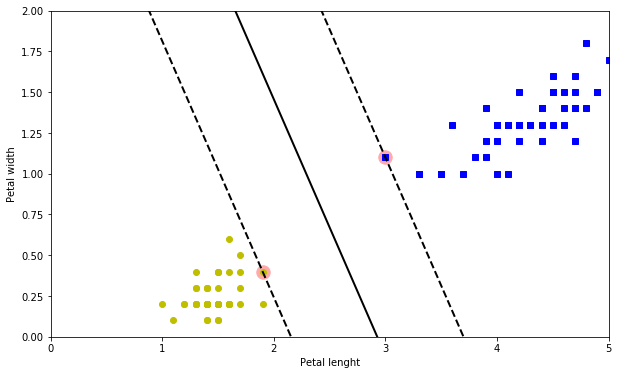

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def plot_svm_decision_boundary(svm_clf, xmin, xmax):
    # get model coefficients and intercept
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # At decision boundary: w0*x0 + w1*x1 + b = 0
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-', linewidth=2)
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)

plt.figure(figsize=(10, 6))
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris-Setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris-Versicolour')
#plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris-Virginica')
plot_svm_decision_boundary(svm_clf, 0.0, 5.5)
plt.xlabel('Petal lenght')
plt.ylabel('Petal width')
plt.axis([0.0, 5.0, 0.0, 2.0])
plt.show()

One good advantage of SVM is that adding more training samples won't affect the decision boundary as the boundary is fully *supported* by the instances located at the edge of the street. These instances are called *support vectors.*

**Note:** SVM is sensitive to the feature scales, it is better to work with a scaled form of them.

## Soft Margin classification
If we strictly impose that all instances be off the street and on the right side, this is called *hard margin classification;* this is hard because the data should be linearly separable and SVM is sensitive to outliers. So if we have an outlier in one of the two groups, it is impossible to satisfy both conditions. Other situation could be that the outliers lies in the middle of the decision boundary.

To cope with this, we can find a good balance between finding the widest possible street while limiting the margin violations. This is called *soft margin classification.* In Scikit-Learn, we can control this by using the `C` hyperparameter. A smaller `C` leads to a wider street but more margin violations.

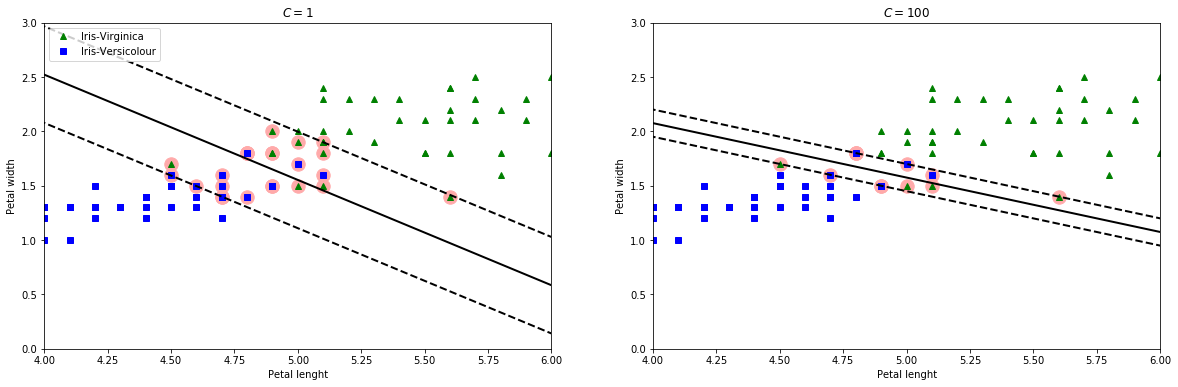

In [34]:
%matplotlib inline 

versicolour_or_virginica = (y_original == 1) | (y_original == 2)
X = X_original[versicolour_or_virginica]
y = y_original[versicolour_or_virginica]

svm_clf_sc = SVC(kernel='linear', C=1)
svm_clf_sc.fit(X, y)
svm_clf_lc = SVC(kernel='linear', C=100)
svm_clf_lc.fit(X, y)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title(r"$C=1$")
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris-Virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris-Versicolour')
plot_svm_decision_boundary(svm_clf_sc, 3.9, 6.5)
plt.xlabel('Petal lenght')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.axis([4.0, 6.0, 0.0, 3.0])

plt.subplot(1, 2, 2)
plt.title(r"$C=100$")
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris-Virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris-Versicolour')
plot_svm_decision_boundary(svm_clf_lc, 3.9, 6.5)
plt.xlabel('Petal lenght')
plt.ylabel('Petal width')
plt.axis([4.0, 6.0, 0.0, 3.0])

plt.show()

We can observe here that, with $C=1$ we have a wider street, allowing some instances to be within the boundaries, while with $C=100$ we have a narrower street.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# LinearSVC is similar to SVC(kernel='linear') but with more options for penalties and cost functions
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X_original, y_original)

/Users/ferro/anaconda3/envs/Deeplearning/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

AttributeError: 'LinearSVC' object has no attribute 'support_vectors_'

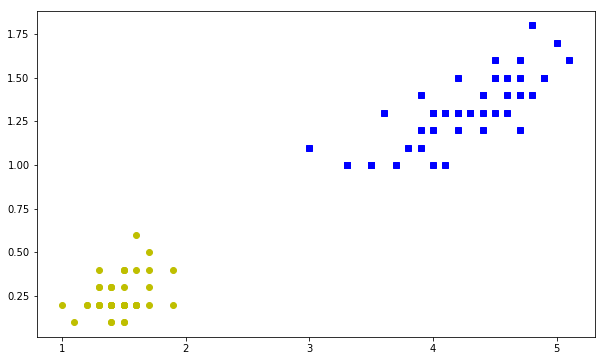

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris-Setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris-Versicolour')
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris-Virginica')
plot_svm_decision_boundary(svm_clf.steps[1][1], 0.0, 5.5)
plt.xlabel('Petal lenght')
plt.ylabel('Petal width')
plt.axis([0.0, 5.0, 0.0, 2.0])
plt.show()

In [42]:
linearSVC = svm_clf.steps[1][1]

In [43]:
linearSVC.

array([0, 1, 2])